In [49]:
import polars as pl
import yfinance as yf
from datetime import date

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

In [40]:
data = (
    pl.DataFrame(
        yf.download('AMZN', start='2010-01-01', end='2023-12-26').reset_index()
    )
    .select(
        pl.col("^.*Date.*$").cast(pl.Date).alias("date"), 
        pl.col("^.*Close.*$").alias("close")
    )
    .with_columns(
        pl.col("close").pct_change().alias('returns')
    )
    .drop_nulls()
)

[*********************100%***********************]  1 of 1 completed


In [42]:
data.head()

date,close,returns
date,f64,f64
2010-01-05,6.7345,0.0059
2010-01-06,6.6125,-0.018116
2010-01-07,6.5,-0.017013
2010-01-08,6.676,0.027077
2010-01-11,6.5155,-0.024041


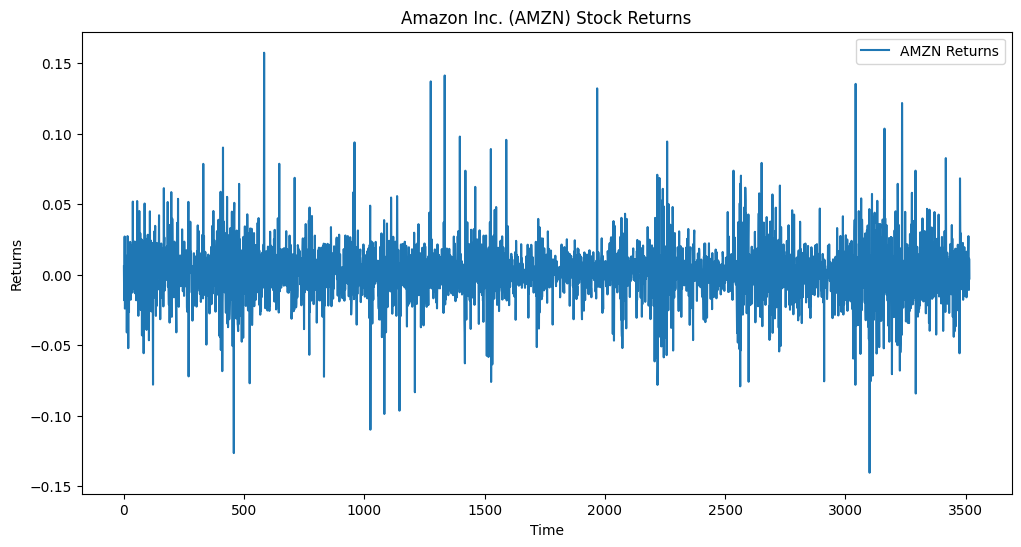

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(data.select('returns'), label='AMZN Returns')
plt.title('Amazon Inc. (AMZN) Stock Returns')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()


In [69]:
def check_stationarity(time_series):
    result = adfuller(time_series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values: \n', [f"{k} : {float(v)}"  for k,v in result[4].items()])
    if result[1] <= 0.05:
        print("We reject the null hypothesis at 5%.\n",
              "Data most probably has no unit root and is stationary")
    else:
        print("We do not reject the null hypothesis. \n", 
              "Data most probably has a unit root and is non-stationary")

In [70]:
check_stationarity(data.select('returns'))

ADF Statistic: -60.599642550224075
p-value: 0.0
Critical Values: 
 ['1% : -3.4322112288397735', '5% : -2.8623623855085953', '10% : -2.5672077698860143']
We reject the null hypothesis at 5%.
 Data most probably has no unit root and is stationary
